In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
#tf.random.set_seed(2)
from variational_autoencoder import VariationalAutoencoder
import autoencoder_models as ae_models
import variational_autoencoder_models as vae_models
from cont_bern_loss import cont_bern_loss

import matplotlib.pyplot as plt

In [2]:
(train_digits, train_labels), (test_digits, test_labels) = keras.datasets.mnist.load_data()
#num_samples = 100
train_digits = np.expand_dims(train_digits, -1).astype("float32") / 255
test_digits = np.expand_dims(test_digits, -1).astype("float32") / 255
input_shape = train_digits.shape[1:]

In [3]:
latent_dim = 10

In [4]:
## AE ##
model = ae_models.get_mnist_cnn_deep(input_shape, latent_dim)
model.compile(optimizer = "adam", loss = cont_bern_loss)

history = model.fit(train_digits,train_digits,
      epochs = 15,
      batch_size = 512,
      verbose = 1 )
model.save("models/ae_cb")

Epoch 1/15


KeyboardInterrupt: ignored

In [30]:
## VAE 10 ##
model = vae_models.get_mnist_cnn_deep(input_shape, latent_dim)
model.compile(optimizer = "adam", 
              reconstruction_loss = keras.losses.binary_crossentropy,
              reconstruction_factor = 0.001,
              latent_factor = 100)

history = model.fit(train_digits,
      epochs = 5,
      batch_size = 512,
      verbose = 1)
#model.save("models/vae_10_cb")

Epoch 1/5
118/118 [==============================] - 5s 27ms/step - Total loss: 9.6621e-04 - Reconstruction loss: 4.3694e-04 - Latent loss: 5.2925e-04
Epoch 2/5
118/118 [==============================] - 3s 27ms/step - Total loss: 2.6564e-04 - Reconstruction loss: 2.6489e-04 - Latent loss: 7.5586e-07
Epoch 3/5
118/118 [==============================] - 3s 27ms/step - Total loss: 2.6422e-04 - Reconstruction loss: 2.6355e-04 - Latent loss: 6.6924e-07
Epoch 4/5
118/118 [==============================] - 3s 27ms/step - Total loss: 2.6395e-04 - Reconstruction loss: 2.6331e-04 - Latent loss: 6.3159e-07
Epoch 5/5
118/118 [==============================] - 3s 28ms/step - Total loss: 2.6456e-04 - Reconstruction loss: 2.6395e-04 - Latent loss: 6.1136e-07


In [31]:
imgs = model(train_digits[0:10])

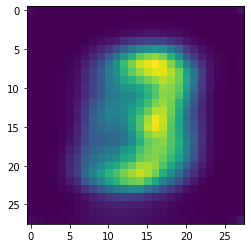

In [32]:
plt.imshow(imgs[0,:,:,0])

  adding: model_ae_cb/ (stored 0%)
  adding: model_ae_cb/saved_model.pb (deflated 91%)
  adding: model_ae_cb/assets/ (stored 0%)
  adding: model_ae_cb/variables/ (stored 0%)
  adding: model_ae_cb/variables/variables.index (deflated 74%)
  adding: model_ae_cb/variables/variables.data-00000-of-00001 (deflated 16%)
  adding: model_ae_cb/keras_metadata.pb (deflated 96%)


INFO:tensorflow:Assets written to: models/ae_mse/assets


INFO:tensorflow:Assets written to: models/vae_10_mse/assets


INFO:tensorflow:Assets written to: models/vae_100_mse/assets


INFO:tensorflow:Assets written to: models/vae_1000_mse/assets


In [ ]:
!zip -r ./models_vae_10.zip ./models/

  adding: models/ (stored 0%)
  adding: models/vae_10/ (stored 0%)
  adding: models/vae_10/saved_model.pb (deflated 90%)
  adding: models/vae_10/assets/ (stored 0%)
  adding: models/vae_10/variables/ (stored 0%)
  adding: models/vae_10/variables/variables.index (deflated 74%)
  adding: models/vae_10/variables/variables.data-00000-of-00001 (deflated 17%)
  adding: models/vae_10/keras_metadata.pb (deflated 96%)
